# **RANSAC ALGORITHM**

---



---



**OVERVIEW :**

---




**Random sample consensus, or** **RANSAC**, is an iterative method for estimating a mathematical model from a data set that contains outliers. The RANSAC algorithm works by identifying the outliers in a data set and estimating the desired model using data that does not contain outliers.


The RANdom SAmple Consensus **(RANSAC)** algorithm proposed by **Fischler and**
**Bolles** is a general parameter estimation approach designed to cope with a large
proportion of outliers in the input data. 

Unlike many of the common robust estimation techniques such as M-estimators and least-median squares that have beenadopted by the computer vision community from the statistics literature, RANSACwas developed from within the computer vision community.


RANSAC is a **resampling technique** that generates candidate solutions by using
the minimum number observations (data points) required to estimate the underlying model parameters. 

As pointed out by Fischler and Bolles, unlike conventional sampling techniques that use as much of the data as possible to obtain an initial solution and then proceed to prune outliers, RANSAC uses the smallest set possible and proceeds to enlarge this set with consistent data points .




For example, the equation of a line that best fits a set of points can be estimated using RANSAC.

**TERMINOLOGIES**:

---



**Outliers:** 

Outliers are data which are far from other data points. These data points can be found at both the ends. Meaning, outliers can be way below a certain point which can be termed as minimum or way more than other point which can be termed as maximum. One of the easy way to find outlier is to use boxplot. Here is the box plot created to find out outliers in the housing prices. In the boxplot given below, one can find outliers at both the ends such as minimum and maximum. These are the points which can have adverse impact on coefficients of regression model if not taken care of. In this post, you will learn about how using RANSAC algorithm will exclude outliers from training data used for training the model.



{'boxes': [<matplotlib.lines.Line2D at 0x7f32ad7af950>],
 'caps': [<matplotlib.lines.Line2D at 0x7f32ad7b48d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f32ad7bc910>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f32ad7bc3d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f32ad7afe10>,
  <matplotlib.lines.Line2D at 0x7f32ad7b4390>]}

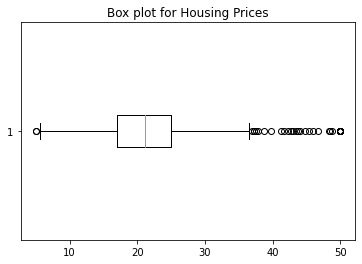

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
#
# Load the boston housing dataset
#
bhd = datasets.load_boston()
X = bhd.data
y = bhd.target
#
# Create the box plot
#
fig1, ax1 = plt.subplots()
ax1.set_title('Box plot for Housing Prices')
ax1.boxplot(y, vert=False)

**Inliers**: 

The data which are not outliers can be said as the inliers. Inliers represent the dataset which are used for training the model using algorithm specified as base_estimator. Looking the boxplot, one can say that the inliers data belong to dataset lying between minimum and maximum point.

**Mean Absolute Deviation (MAD)**: 

Median absolute deviation is measure of variability of observations from the median value of the observation. This will be used to select the inlier threshold to classify whether a data point is inlier or outlier. The choice of right value for MAD is problem specific and the challenge is to select the most appropriate value for MAD to have the model which generalizes well with unseen dataset.

**ALGORITHM** : 

---




1: Select randomly the minimum number of points required to determine the model
parameters.

2: Solve for the parameters of the model.

3: Determine how many points from the set of all points fit with a predefined tolerance.

4: If the fraction of the number of inliers over the total number points in the set exceeds a predefined threshold τ , re-estimate the model parameters using all the identified inliers and terminate.

5: Otherwise, repeat steps 1 through 4 (maximum of N times).

**ADVANTAGES AND DISADVANTAGES :**

---

An advantage of RANSAC is its ability to do robust estimation of the model parameters, i.e., it can estimate the parameters with a high degree of accuracy even when a significant number of outliers are present in the data set.

A disadvantage of RANSAC is that there is no upper bound on the time it takes to compute these parameters (except exhaustion). 
 
When the number of iterations computed is limited the solution obtained may not be optimal, and it may not even be one that fits the data in a good way. In this way RANSAC offers a trade-off; by computing a greater number of iterations the probability of a reasonable model being produced is increased. 
 
Moreover, RANSAC is not always able to find the optimal set even for moderately contaminated sets and it usually performs badly when the number of inliers is less than 50%.
 
Optimal RANSAC was proposed to handle both these problems and is capable of finding the optimal set for heavily contaminated sets, even for an inlier ratio under 5%. 

Another disadvantage of RANSAC is that it requires the setting of problem-specific thresholds.

RANSAC can only estimate one model for a particular data set. As for any one-model approach when two (or more) model instances exist, RANSAC may fail to find either one. 

The Hough transform is one alternative robust estimation technique that may be useful when more than one model instance is present. 

Another approach for multi model fitting is known as PEARL, which combines model sampling from data points as in RANSAC with iterative re-estimation of inliers and the multi-model fitting being formulated as an optimization problem with a global energy function describing the quality of the overall solution.


**IMPLEMENTING RANSAC ALGORITHM IN PYTHON** :

---



**Robust linear model estimation using RANSAC**

---



Estimated coefficients (true, linear regression, RANSAC):
82.1903908407869 [54.17236387] [82.08533159]


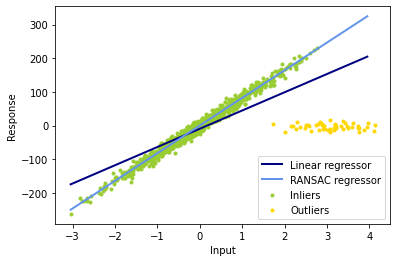

In [ ]:

import numpy as np
from matplotlib import pyplot as plt

from sklearn import linear_model, datasets


n_samples = 1000
n_outliers = 50


X, y, coef = datasets.make_regression(
    n_samples=n_samples,
    n_features=1,
    n_informative=1,
    noise=10,
    coef=True,
    random_state=0,
)

# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

# Fit line using all data
lr = linear_model.LinearRegression()
lr.fit(X, y)

# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

# Compare estimated coefficients
print("Estimated coefficients (true, linear regression, RANSAC):")
print(coef, lr.coef_, ransac.estimator_.coef_)

lw = 2
plt.scatter(
    X[inlier_mask], y[inlier_mask], color="yellowgreen", marker=".", label="Inliers"
)
plt.scatter(
    X[outlier_mask], y[outlier_mask], color="gold", marker=".", label="Outliers"
)
plt.plot(line_X, line_y, color="navy", linewidth=lw, label="Linear regressor")
plt.plot(
    line_X,
    line_y_ransac,
    color="cornflowerblue",
    linewidth=lw,
    label="RANSAC regressor",
)
plt.legend(loc="lower right")
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()